In [ ]:
#Convolutional Neural Networks

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 1: Load and preprocess the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize pixel values to [0,1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Add channel dimension (28,28) -> (28,28,1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
# Build CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), activation='relu',
                   input_shape=(28,28,1), padding='same'),
    layers.MaxPooling2D((2,2)),
    # Second convolutional block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    # Classification head
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile model
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [16]:
# Train model
history = model.fit(x_train, y_train,
                    epochs=3,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 74ms/step - accuracy: 0.8778 - loss: 0.3439 - val_accuracy: 0.8938 - val_loss: 0.2956
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 75ms/step - accuracy: 0.9064 - loss: 0.2575 - val_accuracy: 0.8938 - val_loss: 0.2887
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 79ms/step - accuracy: 0.9183 - loss: 0.2254 - val_accuracy: 0.9067 - val_loss: 0.2553


In [17]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9028 - loss: 0.2604
Test accuracy: 90.67%


In [18]:
# Plot training history
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

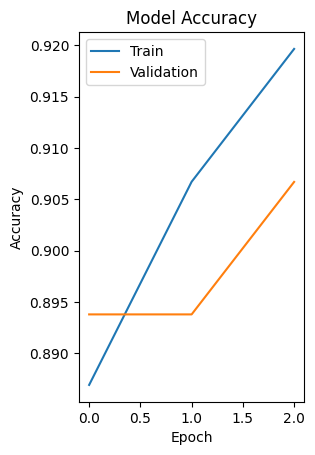

In [19]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

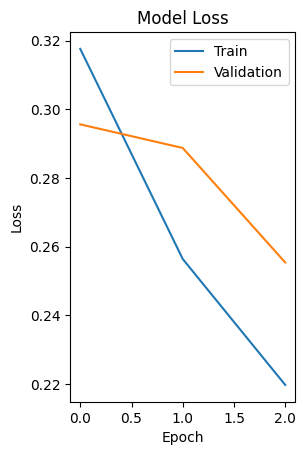

In [20]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [21]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [23]:
# Make sample predictions
sample_images = x_test[:5]
# Make sample predictions
sample_images = x_test[:5]
predictions = model.predict(sample_images)
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


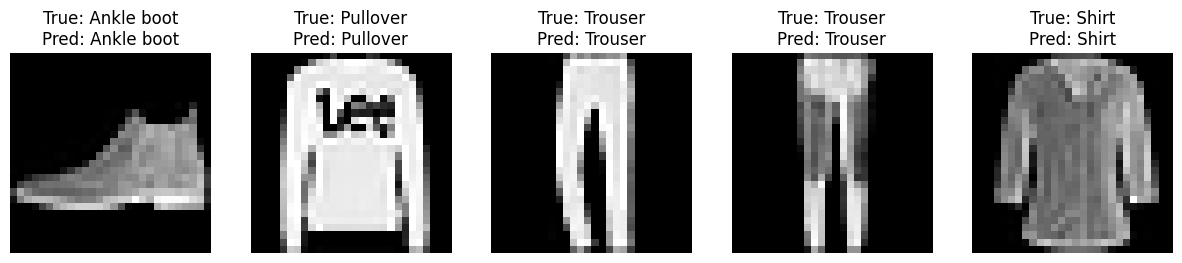

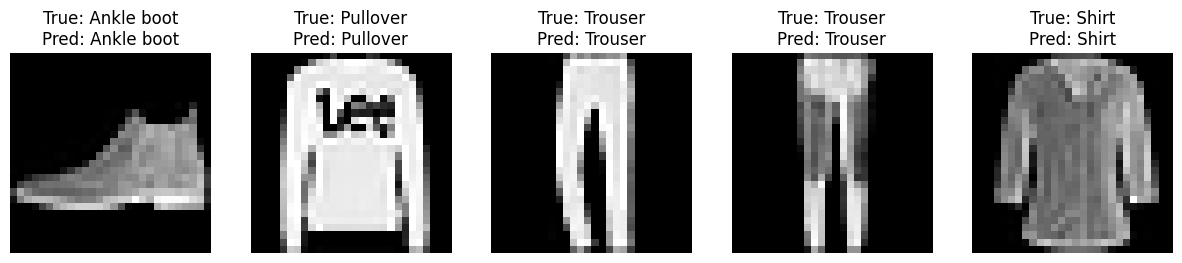

In [26]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[np.argmax(y_test[i])]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.show()
plt.show()